# Day-70: CNN Mini Project (Garbage Classification using Keras)

Welcome back to Day 70 of our 100 Days Data Science Challenge! Today, we’re going hands-on with a real-world CNN project — Garbage Classification!
We’ll use the dataset from Kaggle: Garbage Classification V2.[https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2/data]

The goal of this project is to classify garbage images into categories like cardboard, glass, metal, paper, plastic, and trash — which is a real sustainability challenge.
This type of model can be used in smart waste segregation systems — imagine smart bins that automatically separate waste using cameras!

## Topics Covered

- Introduction to Dataset

- Data Preprocessing for CNNs

- Building the CNN Model Architecture in Keras

- Compiling and Training the Model

- Model Evaluation and Visualization

## Introduction to Dataset

- Imagine your dataset is like a massive collection of photos from a chaotic party, and your job is to sort them into albums: "Cardboard," "Glass," "Metal," "Paper," "Plastic," and "Trash."
- That's essentially what we're doing! The Garbage Classification v2 dataset is our photo collection, containing images of different waste types. 
- We need to look at these images (our data points) and teach our model to recognize the patterns for each category. It's a classic multi-class image classification problem.

In [21]:
! pip install kagglehub scikit-learn pandas

     --------------------------------------- 11.3/11.3 MB 43.7 MB/s eta 0:00:00
     ------------------------------------- 509.2/509.2 kB 16.1 MB/s eta 0:00:00
     ------------------------------------- 347.8/347.8 kB 22.5 MB/s eta 0:00:00


In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumn2u/garbage-classification-v2")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\amey9\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8


C:\Users\amey9\.cache\kagglehub\datasets\sumn2u\garbage-classification-v2\versions\8\garbage-dataset


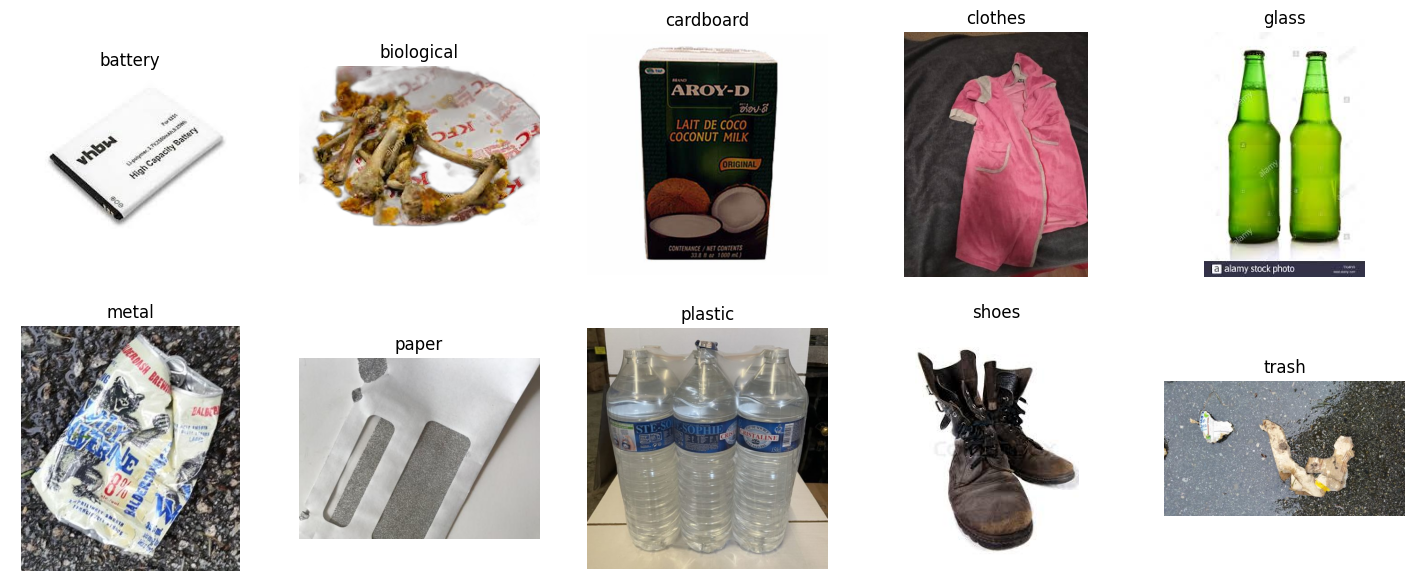

In [23]:
import matplotlib.pyplot as plt
import os

data = path + '\garbage-dataset'

print(data)

plt.figure(figsize = (18,7))

categorise = os.listdir(data)
for i, category in enumerate(categorise):
    category_path = os.path.join(data, category)
    image = os.listdir(category_path)[0]
    image_path = os.path.join(category_path, image)
    read_image = plt.imread(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(read_image)
    plt.title(category)
    plt.axis('off')

plt.show()


In [29]:
from sklearn.model_selection import train_test_split
import pandas as pd
classes = os.listdir(data)


image_paths = []
labels = []

for class_name in classes:
    class_path = os.path.join(data, class_name)
    for fname in os.listdir(class_path):
        image_paths.append(os.path.join(class_path, fname))
        labels.append(class_name)

df = pd.DataFrame({
    'filename': image_paths,
    'class': labels
})

print(df.head())

train, temp = train_test_split(df, test_size=0.3, stratify=df['class'], random_state=42)
valid, test = train_test_split(temp, test_size=0.3, stratify=temp['class'], random_state=42)

                                            filename    class
0  C:\Users\amey9\.cache\kagglehub\datasets\sumn2...  battery
1  C:\Users\amey9\.cache\kagglehub\datasets\sumn2...  battery
2  C:\Users\amey9\.cache\kagglehub\datasets\sumn2...  battery
3  C:\Users\amey9\.cache\kagglehub\datasets\sumn2...  battery
4  C:\Users\amey9\.cache\kagglehub\datasets\sumn2...  battery
